In [1]:
# my_data.csv 파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

df1 = pd.read_csv('my_data_1.csv')

In [2]:
# step이 100부터 350까지인 데이터만 추출하기
df1 = df1[(df1['step'] >= 100) & (df1['step'] <= 350)]
df1 = df1[~df1['lane_id'].str.startswith('c')]

In [3]:
# Grouping by lane_id and calculating the mean of queueing_length and queueing_time
df1 = df1.groupby('lane_id')[['queueing_length', 'queueing_time']].mean().reset_index()

print(df1)

  lane_id  queueing_length  queueing_time
0      1c        53.455772      48.877046
1      2c       238.490891      58.810278
2      3c       262.541124      51.288431
3      4c       296.962646      54.935324


In [4]:
# my_data.csv 파일 불러오기

df2 = pd.read_csv('my_data_2.csv')

In [5]:
# step이 100부터 350까지인 데이터만 추출하기
df2 = df2[(df2['step'] >= 100) & (df2['step'] <= 350)]
df2 = df2[~df2['lane_id'].str.startswith('c')]

# df2에서 lane_id가 ":c"로 시작하는 행 제거
df2 = df2[~df2['lane_id'].str.startswith(':c')]

In [6]:
# Grouping by lane_id and calculating the mean of queueing_length and queueing_time
df2 = df2.groupby('lane_id')[['queueing_length', 'queueing_time']].mean().reset_index()

print(df2)

# 전처리 : lane_id 가 c로 시작하는 행 제거


  lane_id  queueing_length  queueing_time
0      1c        38.361756      33.485837
1      2c       177.858192      40.665098
2      3c       243.185571      49.696616
3      4c       287.442380      49.492469


In [7]:
# df1과 df2의 lane_id 열의 [1c, 2c, 3c, 4c]를 각각 [부도로(강남세브란스병원방면), 부도로(봉은사로방면), 주도로(선릉역방면), 주도로(역삼역방면)] 으로 변경
df1['lane_id'] = df1['lane_id'].replace({'1c':'1c : 부도로(강남세브란스병원방면)', '2c':'2c : 부도로(봉은사로방면)', '3c':'3c : 주도로(선릉역방면)', '4c':'4c : 주도로(역삼역방면)'})
df2['lane_id'] = df2['lane_id'].replace({'1c':'1c : 부도로(강남세브란스병원방면)', '2c':'2c : 부도로(봉은사로방면)', '3c':'3c : 주도로(선릉역방면)', '4c':'4c : 주도로(역삼역방면)'})
df1
df2

                lane_id  queueing_length  queueing_time
0  1c : 부도로(강남세브란스병원방면)        53.455772      48.877046
1      2c : 부도로(봉은사로방면)       238.490891      58.810278
2       3c : 주도로(선릉역방면)       262.541124      51.288431
3       4c : 주도로(역삼역방면)       296.962646      54.935324
                lane_id  queueing_length  queueing_time
0  1c : 부도로(강남세브란스병원방면)        38.361756      33.485837
1      2c : 부도로(봉은사로방면)       177.858192      40.665098
2       3c : 주도로(선릉역방면)       243.185571      49.696616
3       4c : 주도로(역삼역방면)       287.442380      49.492469


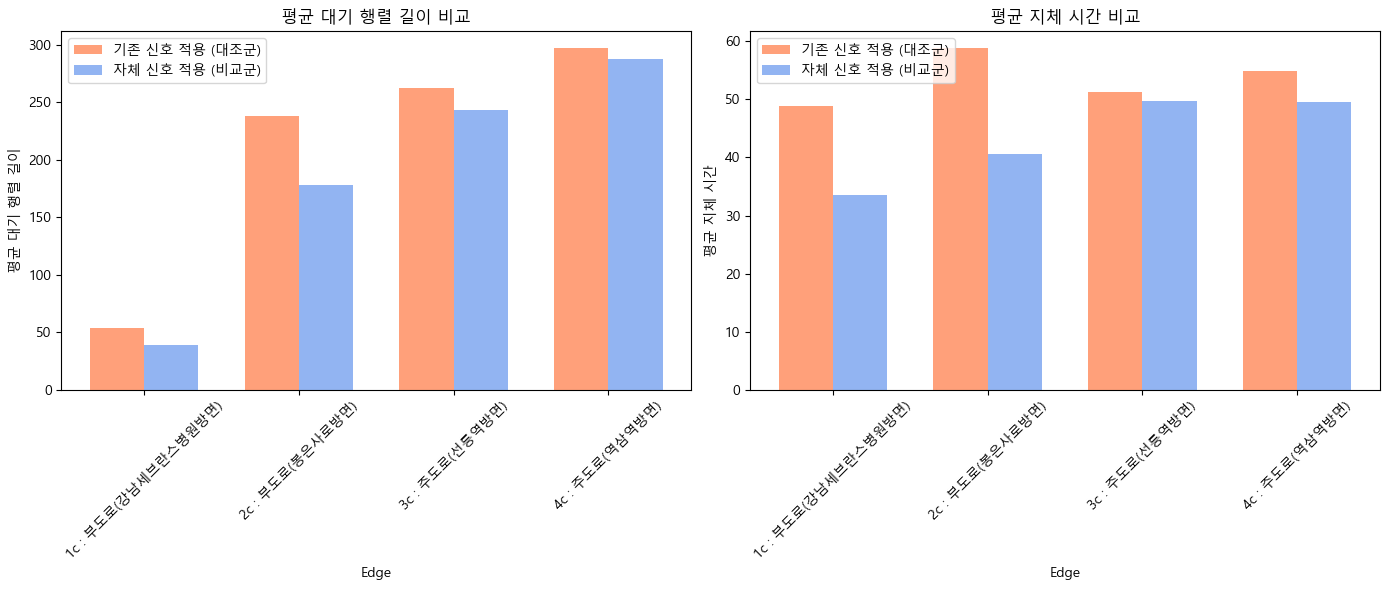

In [8]:
# Plotting queueing_length and queueing_time on separate bar charts

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting queueing_length
bar_width = 0.35  # the width of the bars
index = df1['lane_id']

r1 = range(len(index))
r2 = [x + bar_width for x in r1]

ax1.bar(r1, df1['queueing_length'], bar_width, label='기존 신호 적용 (대조군)', color='lightsalmon')
ax1.bar(r2, df2['queueing_length'], bar_width, label='자체 신호 적용 (비교군)', alpha=0.7, color='cornflowerblue')

ax1.set_xlabel('Edge')
ax1.set_ylabel('평균 대기 행렬 길이')
ax1.set_title('평균 대기 행렬 길이 비교')
ax1.set_xticks([r + bar_width / 2 for r in range(len(index))])
ax1.set_xticklabels(index, rotation=45)
ax1.legend(loc='upper left')

# Plotting queueing_time
ax2.bar(r1, df1['queueing_time'], bar_width, label='기존 신호 적용 (대조군)', color='lightsalmon')
ax2.bar(r2, df2['queueing_time'], bar_width, label='자체 신호 적용 (비교군)', alpha=0.7, color='cornflowerblue')

ax2.set_xlabel('Edge')
ax2.set_ylabel('평균 지체 시간')
ax2.set_title('평균 지체 시간 비교')
ax2.set_xticks([r + bar_width / 2 for r in range(len(index))])
ax2.set_xticklabels(index, rotation=45)
# legend 왼쪽으로 고정
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [17]:
# temp_step_1.csv 파일 불러오기
df3 = pd.read_csv('temp_step_1.csv')

In [18]:
# df3의 평균 구하기
df3 = df3.mean().reset_index()

In [19]:
df3

,index,0
0,step,99.91904
